### 1. Import libraies 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os
%matplotlib inline


import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)

from matplotlib import pyplot as plt
import seaborn as sns


### 2.Import Data

In [2]:
# training data without labels
train = pd.read_csv('./Data/dengue_features_train.csv')#, index_col=[0,1,2])
y = pd.read_csv('./data/dengue_labels_train.csv')#,index_col=[0,1,2])
test = pd.read_csv('./data/dengue_features_test.csv')#,index_col=[0,1,2])

#training data with labels
df=pd.merge(train, y, how='left', on =['city', 'year', 'weekofyear'])

In [3]:
df.head(2)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.1226,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.1699,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5


### 3. Total 20 Features 

1. NOAA's GHCN daily climate data weather station measurements (start from here we need to look at the data by each city)
* station_max_temp_c – Maximum temperature
* station_min_temp_c – Minimum temperature
* station_avg_temp_c – Average temperature
* station_precip_mm – Total precipitation
* station_diur_temp_rng_c – Diurnal temperature range

2. PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)
* precipitation_amt_mm – Total precipitation

3. NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)
* reanalysis_sat_precip_amt_mm – Total precipitation
* reanalysis_dew_point_temp_k – Mean dew point temperature
* reanalysis_air_temp_k – Mean air temperature
* reanalysis_relative_humidity_percent – Mean relative humidity
* reanalysis_specific_humidity_g_per_kg – Mean specific humidity
* reanalysis_precip_amt_kg_per_m2 – Total precipitation
* reanalysis_max_air_temp_k – Maximum air temperature
* reanalysis_min_air_temp_k – Minimum air temperature
* reanalysis_avg_temp_k – Average air temperature
* reanalysis_tdtr_k – Diurnal temperature range

4. Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements
* ndvi_se – Pixel southeast of city centroid
* ndvi_sw – Pixel southwest of city centroid
* ndvi_ne – Pixel northeast of city centroid
* ndvi_nw – Pixel northwest of city centroid


### Quickly visulize the data

In [4]:
df = df.set_index('week_start_date')

<Axes: title={'center': 'station_max_temp_c'}, xlabel='week_start_date'>

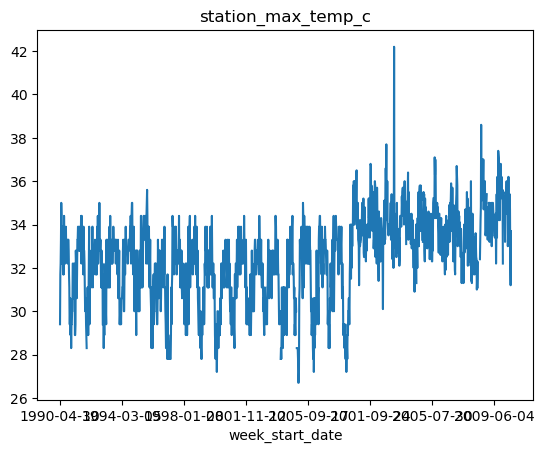

In [6]:
df['station_max_temp_c'].plot(kind='line', title = 'station_max_temp_c')

<Axes: title={'center': 'station_avg_temp_c'}, xlabel='week_start_date'>

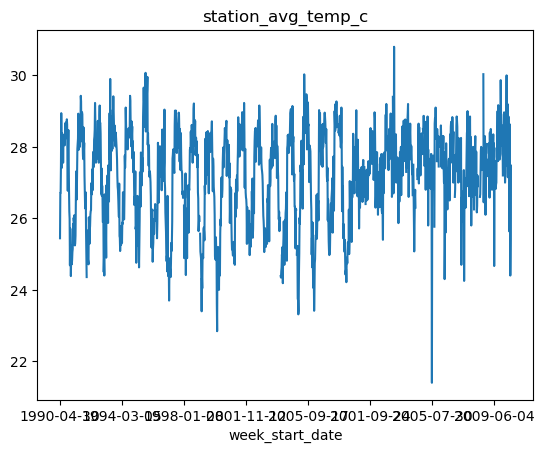

In [9]:
df['station_avg_temp_c'].plot(kind='line', title = 'station_avg_temp_c')


<AxesSubplot:>

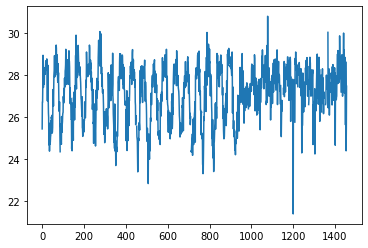

In [152]:
df['station_avg_temp_c'].plot(kind='line')

<AxesSubplot:>

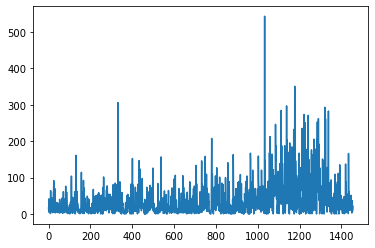

In [168]:
#Total precipitation
df['station_precip_mm'].plot(kind='line')

<AxesSubplot:>

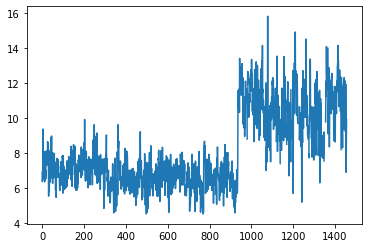

In [154]:
# Diurnal temperature range
df['station_diur_temp_rng_c'].plot(kind='line')

<AxesSubplot:>

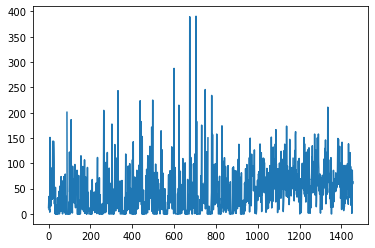

In [157]:
#Total precipitation
df['precipitation_amt_mm'].plot(kind='line')

<AxesSubplot:>

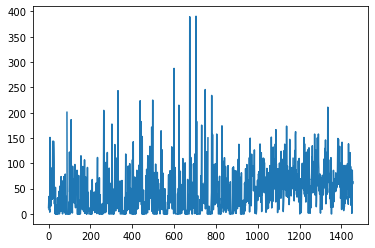

In [158]:
#Total precipitation

df['reanalysis_sat_precip_amt_mm'].plot(kind='line')

<AxesSubplot:>

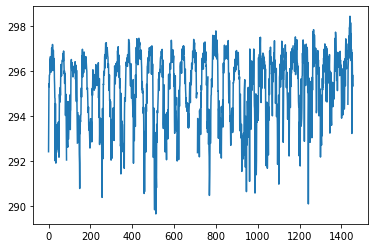

In [159]:
df['reanalysis_dew_point_temp_k'].plot(kind='line')


<AxesSubplot:>

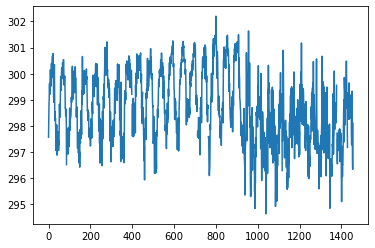

In [160]:
df['reanalysis_air_temp_k'].plot(kind='line')


<AxesSubplot:>

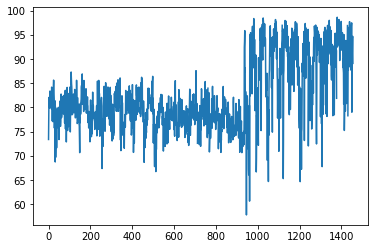

In [161]:
df['reanalysis_relative_humidity_percent'].plot(kind='line')


<AxesSubplot:>

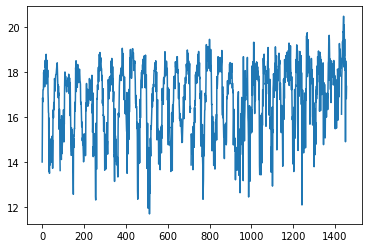

In [162]:
df['reanalysis_specific_humidity_g_per_kg'].plot(kind='line')


<AxesSubplot:>

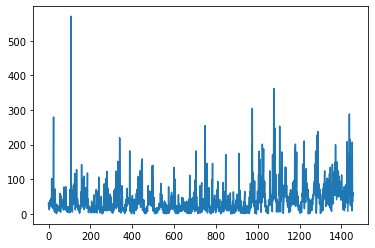

In [163]:
#Total precipitation
df['reanalysis_precip_amt_kg_per_m2'].plot(kind='line')

<AxesSubplot:>

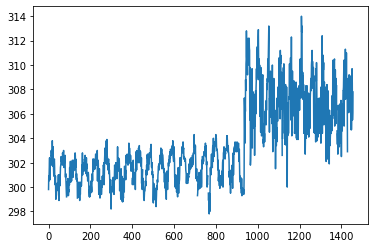

In [164]:
df['reanalysis_max_air_temp_k'].plot(kind='line')


<AxesSubplot:>

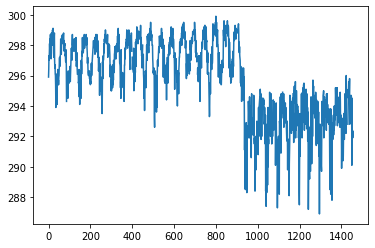

In [165]:
df['reanalysis_min_air_temp_k'].plot(kind='line')


<AxesSubplot:>

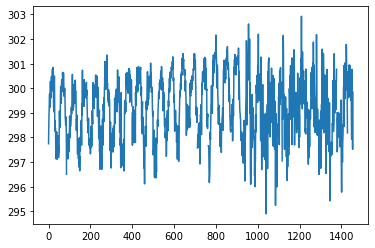

In [166]:
df['reanalysis_avg_temp_k'].plot(kind='line')


<AxesSubplot:>

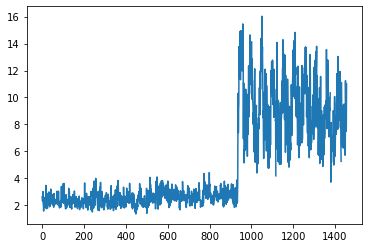

In [167]:
#Diurnal temperature range
df['reanalysis_tdtr_k'].plot(kind='line')
